### Further data preprocessing and application of machine learning algorithms

In [1]:
#importing frameworks needed for machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
#reading the dataset from data cleaning
main_dataset = pd.read_csv('final.csv')
main_dataset.head(3)

,parent_country_id,country_id,country,year,death_rate,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Adjusted savings: particulate emission damage (% of GNI),"Life expectancy at birth, total (years)",...,Population practising open defecation (%),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%),mean_Household air pollution from solid fuels (% of pop),population,mean_Nitrogen dioxide pollution_ppb,mean_Ambient ozone pollution_ppb,mean_Ambient particulate matter pollution_micrograms per cubic meter,latitude,longitude
0,Eastern Mediterranean,AFG,Afghanistan,2019,269.1,32.6,15.6,83.2,2.076352,63.565,...,11.01,32.6,67.4,0.658391,45349646.89,4.331494,54.123246,58.330872,33.93911,67.709953
1,Eastern Mediterranean,AFG,Afghanistan,2018,275.1,31.4,14.5,82.6,2.209369,63.081,...,11.74,31.4,68.6,0.679028,43950218.05,4.324632,54.185048,67.227177,33.93911,67.709953
2,Eastern Mediterranean,AFG,Afghanistan,2017,277.3,30.3,13.5,81.6,2.332473,63.016,...,12.48,30.3,69.7,0.698902,42575387.39,4.306299,57.293701,65.862347,33.93911,67.709953


In [3]:
#information about dataset
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 77 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

#### Preliminary checks

1. There are 77 columns.

2. Check if countries have same number of years

3. Check years column to confirm if the years are 2010-2019

3. Check if there are duplicated columns.

4. Remove columns with lots of missing values (more than 90% of datapoints missing)

5. Check useful features and reduce dimensionality if needed.



### Points 2 & 3. Check if countries have same time (years). Check years column to confirm if the years are 2010-2019

In [4]:
main_dataset.groupby(['country'])[['year']].count().sort_values('year', ascending=False) 

#result below shows that each country has 10 different years 

,year
country,
Afghanistan,10
New Zealand,10
Niger,10
Nigeria,10
North Macedonia,10
...,...
Germany,10
Ghana,10
Greece,10


##### check years 2010-2019

In [5]:
main_dataset['year'].value_counts() 

#each year has 180 records, meaning each year has a record for each of the 180 countries

2019    180
2018    180
2017    180
2016    180
2015    180
2014    180
2013    180
2012    180
2011    180
2010    180
Name: year, dtype: int64

### Point 4. Check if there are duplicated columns or if multiple columns represent the same variable

In [6]:
#from .info there are some columns that seem to represent the same variable:

# 1. Population, total & population

# 2. PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) & 
#    mean_Ambient particulate matter pollution_micrograms per cubic meter &
#    Concentrations of fine particulate matter (PM2.5)

# 3. Access to clean fuels and technologies for cooking  (% of population) &
#    Proportion of population with primary reliance on clean fuels and technologies for cooking (%)

# 4. Life expectancy at birth, total (years) & Life expectancy at age 60 (years)

In [7]:
main_dataset[["country", 'year',"Population, total", "population"]].head()

#a google search on randomly selected countries indicated that (Population, total) is closest to the actual populations
#of the countries hence (population) will be dropped.

#Further, the dataset from which (Population, total) belongs to was used in calculating certain variables in the 
#dataset so it will be prudent to leave (Population, total) and drop (population)

,country,year,"Population, total",population
0,Afghanistan,2019,37769499.0,45349646.89
1,Afghanistan,2018,36686784.0,43950218.05
2,Afghanistan,2017,35643418.0,42575387.39
3,Afghanistan,2016,34636207.0,41225567.62
4,Afghanistan,2015,33753499.0,39907345.47


###### 4.1 dropping (population) column

In [8]:
main_dataset_updated_0 = main_dataset.drop('population', axis=1)

###### 4.2 M2.5 air pollution, mean annual exposure (micrograms per cubic meter) & mean_Ambient particulate matter pollution_micrograms per cubic meter & Concentrations of fine particulate matter (PM2.5)

In [9]:
main_dataset_updated_0[["country","year",
                        "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", 
                       "mean_Ambient particulate matter pollution_micrograms per cubic meter", 
                       "Concentrations of fine particulate matter (PM2.5)"]].head()

#two columns report the same figures (because  both were from the same source but were in different datasets).
#One of these in addition to Concentrations of fine particulate matter (PM2.5) will be dropped because  
#PM2.5 air pollution... is included in a large dataset which contains variables to be used in this project.

,country,year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",mean_Ambient particulate matter pollution_micrograms per cubic meter,Concentrations of fine particulate matter (PM2.5)
0,Afghanistan,2019,58.330872,58.330872,62.49
1,Afghanistan,2018,67.227177,67.227177,70.25
2,Afghanistan,2017,65.862347,65.862347,61.78
3,Afghanistan,2016,72.765910,72.765910,64.00
4,Afghanistan,2015,73.490818,73.490818,67.20


In [10]:
#dropping one of the two columns that report same variable and also drop Concentrations of fine particulate matter (PM2.5)
main_dataset_updated_1 = main_dataset_updated_0.drop(["mean_Ambient particulate matter pollution_micrograms per cubic meter",
                                           "Concentrations of fine particulate matter (PM2.5)"], axis=1)

###### 4.3 Access to clean fuels and technologies for cooking  (% of population) & Proportion of population with primary reliance on clean fuels and technologies for cooking (%)

In [11]:
main_dataset_updated_1[["country","year",
                       "Access to clean fuels and technologies for cooking  (% of population)",
                       "Proportion of population with primary reliance on clean fuels and technologies for cooking (%)",
                       "Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)"]].head()

#the result show that one of the two variables can be omitted because they report the same thing

,country,year,Access to clean fuels and technologies for cooking (% of population),Proportion of population with primary reliance on clean fuels and technologies for cooking (%),Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)
0,Afghanistan,2019,32.6,32.6,67.4
1,Afghanistan,2018,31.4,31.4,68.6
2,Afghanistan,2017,30.3,30.3,69.7
3,Afghanistan,2016,28.8,28.8,71.2
4,Afghanistan,2015,27.6,27.6,72.4


In [12]:
#dropping Access to clean fuels and technologies for cooking (% of population)
main_dataset_updated_2 = main_dataset_updated_1.drop('Access to clean fuels and technologies for cooking  (% of population)', axis=1)

In [13]:
main_dataset_updated_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 73 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

###### 4.4 Life expectancy at birth, total (years) & Life expectancy at birth, total (years)

In [14]:
main_dataset_updated_2[["country",'year',"Life expectancy at birth, total (years)",
                        "Life expectancy at birth (years)", 
                        "Life expectancy at age 60 (years)"]]

# Life expectancy at birth, total (years) aligns with figures from search on google.
# Life expectancy at birth (years) and Life expectancy at age 60 (years) will be dropped.

,country,year,"Life expectancy at birth, total (years)",Life expectancy at birth (years),Life expectancy at age 60 (years)
0,Afghanistan,2019,63.565,61.22,15.16
1,Afghanistan,2018,63.081,60.49,15.06
2,Afghanistan,2017,63.016,60.88,15.06
3,Afghanistan,2016,63.136,60.39,14.99
4,Afghanistan,2015,62.659,60.33,14.93
...,...,...,...,...,...
1795,Zimbabwe,2014,58.846,56.96,13.97
1796,Zimbabwe,2013,57.458,56.08,13.84
1797,Zimbabwe,2012,55.626,54.90,13.66
1798,Zimbabwe,2011,53.347,53.28,13.39


In [15]:
main_dataset_updated_3 = main_dataset_updated_2.drop(["Life expectancy at birth (years)",
                                                      "Life expectancy at age 60 (years)"], axis=1)

### Point 5. Remove columns with lots of missing values (more than 90% of datapoints missing)

In [16]:
#columns with less than 1000 records. (ps: there are 1800 entries)

In [17]:
#creating dataframe of missing values
main_missing_values = pd.DataFrame(main_dataset_updated_3.isna().sum(), columns=['missing_values'])

In [18]:
main_missing_values[main_missing_values['missing_values']>800] 

#these variables have more than half of their datapoints missing
#the variables will be omitted

,missing_values
Methane (CH4) emissions from Industrial Processes (Mt CO2e),880
Carbon dioxide (CO2) emissions from Waste (Mt CO2e),920
Animal waste_TJ,1575
Bagasse_TJ,1053
Biodiesel_TJ,1289
Biogases_TJ,1336
Biogasoline_TJ,1278
Black liquor_TJ,1564
Gaseous biofuels_TJ,1310
Liquid biofuels_TJ,1150


In [19]:
len(main_missing_values[main_missing_values['missing_values']>800].index) #12 columns will be dropped

12

In [20]:
#dropping columns with over 800 missing values
missing_values_col = main_missing_values[main_missing_values['missing_values']>800].index
main_dataset_updated_4 = main_dataset_updated_3.drop(missing_values_col, axis=1)

In [21]:
main_dataset_updated_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 59 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

### Using aggregated variables instead of disaggregated variables to reduce dimensionality of the dataset

In [22]:
disagg_cols_to_drop = ['Methane (CH4) emissions from Agriculture (Mt CO2e)',
               'Methane (CH4) emissions from Building (Energy) (Mt CO2e)',
               'Methane (CH4) emissions from Fugitive Emissions (Energy)',
               'Methane (CH4) emissions from Industrial Combustion (Energy) (Mt CO2e)',
               'Methane (CH4) emissions from Power Industry (Energy) (Mt CO2e)',
               'Methane (CH4) emissions from Transport (Energy) (Mt CO2e)',
               'Methane (CH4) emissions from Waste (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Agriculture (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Building (Energy) (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Industrial Combustion (Energy)',
               'Carbon dioxide (CO2) emissions from Industrial Processes (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Power Industry (Energy) (Mt CO2e)',
               'Carbon dioxide (CO2) emissions from Transport (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Agriculture (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Building (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Fugitive Emissions (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Industrial Combustion (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Power Industry (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Industrial Processes (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Transport (Energy) (Mt CO2e)',
               'Nitrous oxide (N2O) emissions from Waste (Mt CO2e)',
               'Total greenhouse gas emissions including LULUCF (Mt CO2e)', 'Charcoal_TJ', 'Fuelwood_TJ']

In [23]:
#dropping disaggregated columns

main_dataset_updated_5 = main_dataset_updated_4.drop(disagg_cols_to_drop, axis=1)
main_dataset_updated_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 34 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

### Standardizing emission variables using per capita

In [24]:

#     DROP these after getting their per capita values: per capita gives emissions per person (easy to compare countries)

#     Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e), 
#     Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)
#     Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)
#     Total greenhouse gas emissions excluding LULUCF (Mt CO2e)

In [25]:
main_dataset_updated_5[["Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)", 
                        "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)", 
                        "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
                        "Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)",
                       "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)", 
                       "Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)",
                       "Population, total"]].head()

,Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Population, total"
0,18.3696,7.4479,0.197194,3.7804,30.2322,0.800440,37769499.0
1,18.7301,8.1289,0.221576,3.9155,31.3494,0.854515,36686784.0
2,18.1972,8.5469,0.239789,4.4311,31.6827,0.888879,35643418.0
3,18.1452,7.9373,0.229162,3.9404,30.4751,0.879863,34636207.0
4,18.1803,8.7196,0.258332,3.8202,31.1165,0.921875,33753499.0


In [26]:
main_dataset_updated_5['Methane (CH4) emissions (total) excluding LULUCF per capita (t CO2e/capita)'] = (main_dataset_updated_5['Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)'] * 1000000) / main_dataset_updated_5["Population, total"]
main_dataset_updated_5["Nitrous oxide (N2O) emissions (total) excluding LULUCF per capita (t CO2e/capita)"] = (main_dataset_updated_5['Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)'] * 1000000) / main_dataset_updated_5["Population, total"]

In [27]:
#standardizing emissions using per capita instead of actual emission values
main_dataset_updated_6 = main_dataset_updated_5.drop(['Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)',
                                             "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)",
                                             "Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)",
                                             "Total greenhouse gas emissions excluding LULUCF (Mt CO2e)"], axis=1)
main_dataset_updated_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 32 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

In [28]:
#drop these columns because it is should be part of the per capita variables

# Emissions (CH4)_kt
# Emissions (CO2)_kt
# Emissions (N2O)_kt
main_dataset_updated_7 = main_dataset_updated_6.drop(["Emissions (CH4)_kt", 
                                                      "Emissions (CO2)_kt", 
                                                      "Emissions (N2O)_kt"], axis=1)

In [29]:
#creating gigajoules for solid biofuls
main_dataset_updated_7['Solid biofuels per capita (GJ/capita)'] = (main_dataset_updated_7['Solid biofuels_TJ'] * 1000)/main_dataset_updated_7['Population, total']

In [30]:
main_dataset_updated_8 = main_dataset_updated_7.drop('Solid biofuels_TJ', axis=1)
main_dataset_updated_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 29 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

In [31]:
#converting Biomass burned from tonnes to gigajoules
main_dataset_updated_8['Burning crop residues (Biomass burned, dry matter) - GJ/capita']=(main_dataset_updated_8['Burning crop residues (Biomass burned, dry matter)_t'] * 16) / main_dataset_updated_8['Population, total']

In [32]:
main_dataset_updated_9 = main_dataset_updated_8.drop("Burning crop residues (Biomass burned, dry matter)_t", axis=1)
main_dataset_updated_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 29 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   death_rate                                                                                      1800 non-null   float64
 5   Access to cle

In [33]:
#rearrange columns
main_dataset_updated_10 = main_dataset_updated_9[["parent_country_id", 'country_id', 'country', 'year', "latitude", "longitude" ,
                        'death_rate', "income_lvl", "Life expectancy at birth, total (years)", "Population, total",
                    "Temperature change °c", "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",
                    "Proportion of population with primary reliance on clean fuels and technologies for cooking (%)",
                    "Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)",
                    "Access to clean fuels and technologies for cooking, rural (% of rural population)",
                    "Access to clean fuels and technologies for cooking, urban (% of urban population)",
                    "Population practising open defecation (%)",
                    "Adjusted savings: particulate emission damage (% of GNI)", 
                    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)",
                    "Methane (CH4) emissions (total) excluding LULUCF per capita (t CO2e/capita)",
                    "Nitrous oxide (N2O) emissions (total) excluding LULUCF per capita (t CO2e/capita)",
                    "Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)",
                    "Total greenhouse gas emissions excluding LULUCF (% change from 1990)",
                    "Solid biofuels per capita (GJ/capita)", 
                    "Burning crop residues (Biomass burned, dry matter) - GJ/capita",
                    "Burned Area_ha", 
                    "mean_Household air pollution from solid fuels (% of pop)",
                    "mean_Nitrogen dioxide pollution_ppb", 
                    "mean_Ambient ozone pollution_ppb"]]
main_dataset_updated_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 29 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   parent_country_id                                                                               1800 non-null   object 
 1   country_id                                                                                      1800 non-null   object 
 2   country                                                                                         1800 non-null   object 
 3   year                                                                                            1800 non-null   int64  
 4   latitude                                                                                        1800 non-null   float64
 5   longitude    

In [34]:
main_dataset_updated_10 = main_dataset_updated_10.sort_values(by=["country", "year"]).reset_index(drop=True)
main_dataset_updated_10.head(3)

,parent_country_id,country_id,country,year,latitude,longitude,death_rate,income_lvl,"Life expectancy at birth, total (years)","Population, total",...,Methane (CH4) emissions (total) excluding LULUCF per capita (t CO2e/capita),Nitrous oxide (N2O) emissions (total) excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),Total greenhouse gas emissions excluding LULUCF (% change from 1990),Solid biofuels per capita (GJ/capita),"Burning crop residues (Biomass burned, dry matter) - GJ/capita",Burned Area_ha,mean_Household air pollution from solid fuels (% of pop),mean_Nitrogen dioxide pollution_ppb,mean_Ambient ozone pollution_ppb
0,Eastern Mediterranean,AFG,Afghanistan,2010,33.93911,67.709953,321.7,Low,60.851,28189672.0,...,0.640589,0.129242,1.067749,120.073847,0.431009,0.111839,47379.6048,0.804882,3.835789,53.026452
1,Eastern Mediterranean,AFG,Afghanistan,2011,33.93911,67.709953,311.0,Low,61.419,29249157.0,...,0.633560,0.127628,1.175377,151.362141,0.416935,0.009131,4013.5013,0.792673,3.945949,52.073179
2,Eastern Mediterranean,AFG,Afghanistan,2012,33.93911,67.709953,304.0,Low,61.923,30466479.0,...,0.595435,0.122604,1.062578,136.696644,0.409073,0.012066,5603.7173,0.779312,4.047048,52.842228


In [35]:
main_dataset_updated_10.shape

(1800, 29)

In [36]:
#checking mean_Household air pollution from solid fuels (% of pop) & 
#Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)

main_dataset_updated_10['mean_Household air pollution from solid fuels (% of pop)']

0       0.804882
1       0.792673
2       0.779312
3       0.766171
4       0.751767
          ...   
1795    0.714680
1796    0.711340
1797    0.706363
1798    0.699547
1799    0.691043
Name: mean_Household air pollution from solid fuels (% of pop), Length: 1800, dtype: float64

In [37]:
main_dataset_updated_10['Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)']

0       80.1
1       78.7
2       77.1
3       75.5
4       73.9
        ... 
1795    70.0
1796    70.0
1797    69.9
1798    69.7
1799    69.7
Name: Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%), Length: 1800, dtype: float64

In [38]:
#the values seem to be the same so lets check the correlation.
#this will help us reduce the number of variables to feed into the machine learning model.
#Reducing dimension of dataset might be helpful for our machine learning models.

In [39]:
#correlation of the two values
main_dataset_updated_10[['Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)',
                       'mean_Household air pollution from solid fuels (% of pop)']].corr()

#the two variables are very highly correlated so one should be dropped.
#mean_Household air pollution from solid fuels (% of pop) should be dropped because the other variable relates to 
#other variables in the dataset.

,Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%),mean_Household air pollution from solid fuels (% of pop)
Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%),1.00000,0.96349
mean_Household air pollution from solid fuels (% of pop),0.96349,1.00000


In [40]:
#drop mean_Household air pollution from solid fuels (% of pop) because it highly correlates with 
#Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)

main_dataset_updated_11 = main_dataset_updated_10.drop('mean_Household air pollution from solid fuels (% of pop)',axis=1)

In [41]:
main_dataset_updated_11.to_csv("tableau_dataset.csv")

### Renaming columns to shorter names

In [42]:
main_dataset_updated_11.rename({"Life expectancy at birth, total (years)":"Life expectancy",
                               "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "PM2.5",
                               "Proportion of population with primary reliance on clean fuels and technologies for cooking (%)": "%-pop using clean fuel to cook",
                               "Prop. of pop. with primary reliance on polluting fuels and tech for cooking (%)": "%-pop using polluting fuel to cook",
                               "Access to clean fuels and technologies for cooking, rural (% of rural population)":"clean fuels (% of rural pop.)",
                               "Access to clean fuels and technologies for cooking, urban (% of urban population)":"clean fuels (% of urban pop.)",
                               "Adjusted savings: particulate emission damage (% of GNI)":"Adj_sav: part. emiss. damage (% of GNI)",
                                "Population practising open defecation (%)":"Open defecation - % of Pop.",
                               "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)": "CO2 per capita",
                               "Methane (CH4) emissions (total) excluding LULUCF per capita (t CO2e/capita)":"CH4 per capita",
                               "Nitrous oxide (N2O) emissions (total) excluding LULUCF per capita (t CO2e/capita)":"N2O per capita",
                               "Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)":"Greenhouse gas emi per capita",
                               "Total greenhouse gas emissions excluding LULUCF (% change from 1990)":"Greenhouse gas emi (% change from 1990)",
                               "Burning crop residues (Biomass burned, dry matter) - GJ/capita":"Burning crop residues"}, axis=1,inplace=True)
main_dataset_updated_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   parent_country_id                        1800 non-null   object 
 1   country_id                               1800 non-null   object 
 2   country                                  1800 non-null   object 
 3   year                                     1800 non-null   int64  
 4   latitude                                 1800 non-null   float64
 5   longitude                                1800 non-null   float64
 6   death_rate                               1800 non-null   float64
 7   income_lvl                               1799 non-null   object 
 8   Life expectancy                          1800 non-null   float64
 9   Population, total                        1800 non-null   float64
 10  Temperature change °c                    1758 no

In [43]:
#missing values
main_dataset_updated_11.isna().sum()

parent_country_id                           0
country_id                                  0
country                                     0
year                                        0
latitude                                    0
longitude                                   0
death_rate                                  0
income_lvl                                  1
Life expectancy                             0
Population, total                           0
Temperature change °c                      42
PM2.5                                       0
%-pop using clean fuel to cook              0
%-pop using polluting fuel to cook          0
clean fuels (% of rural pop.)               0
clean fuels (% of urban pop.)               0
Open defecation - % of Pop.                33
Adj_sav: part. emiss. damage (% of GNI)    93
CO2 per capita                             30
CH4 per capita                             30
N2O per capita                             30
Greenhouse gas emi per capita     

In [44]:
main_dataset_updated_11[main_dataset_updated_11['income_lvl'].isna()]['country'].value_counts()

South Sudan    1
Name: country, dtype: int64

In [45]:
main_dataset_updated_11[main_dataset_updated_11['country']=='South Sudan']

#no income level for South Sudan.
#This country was part of Sudan before independence in 2011 hence the 2010 income level will be that of Sudan's

,parent_country_id,country_id,country,year,latitude,longitude,death_rate,income_lvl,Life expectancy,"Population, total",...,CO2 per capita,CH4 per capita,N2O per capita,Greenhouse gas emi per capita,Greenhouse gas emi (% change from 1990),Solid biofuels per capita (GJ/capita),Burning crop residues,Burned Area_ha,mean_Nitrogen dioxide pollution_ppb,mean_Ambient ozone pollution_ppb
1480,Africa,SSD,South Sudan,2010,7.862685,29.694923,144.6,NaN,54.812,9714419.0,...,NaN,NaN,NaN,NaN,NaN,29.600535,454.135919,41705337.33,1.040692,41.979601
1481,Africa,SSD,South Sudan,2011,7.862685,29.694923,142.6,Lower-middle,54.940,10243050.0,...,NaN,NaN,NaN,NaN,NaN,28.876653,504.177448,47966098.86,1.036435,42.354070
1482,Africa,SSD,South Sudan,2012,7.862685,29.694923,144.2,Low,55.865,10701604.0,...,NaN,NaN,NaN,NaN,NaN,0.639811,431.386989,42938608.21,1.033655,41.929507
1483,Africa,SSD,South Sudan,2013,7.862685,29.694923,137.2,Lower-middle,55.751,11106031.0,...,NaN,NaN,NaN,NaN,NaN,0.587699,393.641468,40233277.63,1.031195,43.710073
1484,Africa,SSD,South Sudan,2014,7.862685,29.694923,135.2,Low,54.973,11213284.0,...,NaN,NaN,NaN,NaN,NaN,0.622565,410.026269,41552889.09,1.027897,43.287766
1485,Africa,SSD,South Sudan,2015,7.862685,29.694923,139.8,Low,55.566,11194299.0,...,NaN,NaN,NaN,NaN,NaN,0.577079,399.049545,41907528.37,1.022603,44.341055
1486,Africa,SSD,South Sudan,2016,7.862685,29.694923,142.5,Low,55.544,11066105.0,...,NaN,NaN,NaN,NaN,NaN,0.589819,439.222102,44923139.04,0.999379,42.430472
1487,Africa,SSD,South Sudan,2017,7.862685,29.694923,140.4,Low,55.309,10658226.0,...,NaN,NaN,NaN,NaN,NaN,0.695801,414.585332,40402451.51,0.956969,43.285943
1488,Africa,SSD,South Sudan,2018,7.862685,29.694923,145.5,Low,55.950,10395329.0,...,NaN,NaN,NaN,NaN,NaN,0.743218,501.888292,47949621.65,0.916229,43.224904
1489,Africa,SSD,South Sudan,2019,7.862685,29.694923,144.4,Low,55.912,10447666.0,...,NaN,NaN,NaN,NaN,NaN,0.741027,288.633754,27531021.69,0.898014,43.330973


In [46]:
main_dataset_updated_11[main_dataset_updated_11['country']=='Sudan'].head(1) #low will be used for South Sudan

,parent_country_id,country_id,country,year,latitude,longitude,death_rate,income_lvl,Life expectancy,"Population, total",...,CO2 per capita,CH4 per capita,N2O per capita,Greenhouse gas emi per capita,Greenhouse gas emi (% change from 1990),Solid biofuels per capita (GJ/capita),Burning crop residues,Burned Area_ha,mean_Nitrogen dioxide pollution_ppb,mean_Ambient ozone pollution_ppb
1510,Eastern Mediterranean,SDN,Sudan,2010,12.862807,30.217636,185.0,Low,63.016,33739933.0,...,0.499722,2.460541,0.78237,3.763303,102.687849,NaN,NaN,NaN,2.535454,39.934639


In [47]:
#filling South Sudan's missing value for income lvl
main_dataset_updated_11.loc[main_dataset_updated_11['income_lvl'].isna(), 'income_lvl'] = 'Low'

In [48]:
#features to create

# 1. Lag Features: Use past values of variables (e.g., PM2.5, emissions) to predict current mortality rates
# 2. Year-on-Year Change: Quantify annual changes to measure trends

In [49]:
# 1. Lag Features: Use past values of variables (e.g., PM2.5, emissions) to predict current mortality rates
main_dataset_updated_11['PM2.5_lag1'] = main_dataset_updated_11.groupby('country')['PM2.5'].shift(1)
main_dataset_updated_11['Death_rate_lag1'] = main_dataset_updated_11.groupby('country')['death_rate'].shift(1)


In [50]:
# 2. Year-on-Year Change: Quantify annual changes to measure trends:
main_dataset_updated_11['PM2.5_change'] = main_dataset_updated_11.groupby('country')['PM2.5'].diff()

### Data split

In [51]:
#splitting dataset
#train set: all years up to 2016 inclusive
train_set = main_dataset_updated_11[main_dataset_updated_11['year'] <=2016]

#validation set: all years after 2016 but up to 2018 inclusive
val_set = main_dataset_updated_11[(main_dataset_updated_11['year']>2016) & (main_dataset_updated_11['year']<=2018)]

#test set: years after 2018
test_set = main_dataset_updated_11[main_dataset_updated_11['year'] >2018]

### Correlation matrix to help reduce dimensionality of dataset

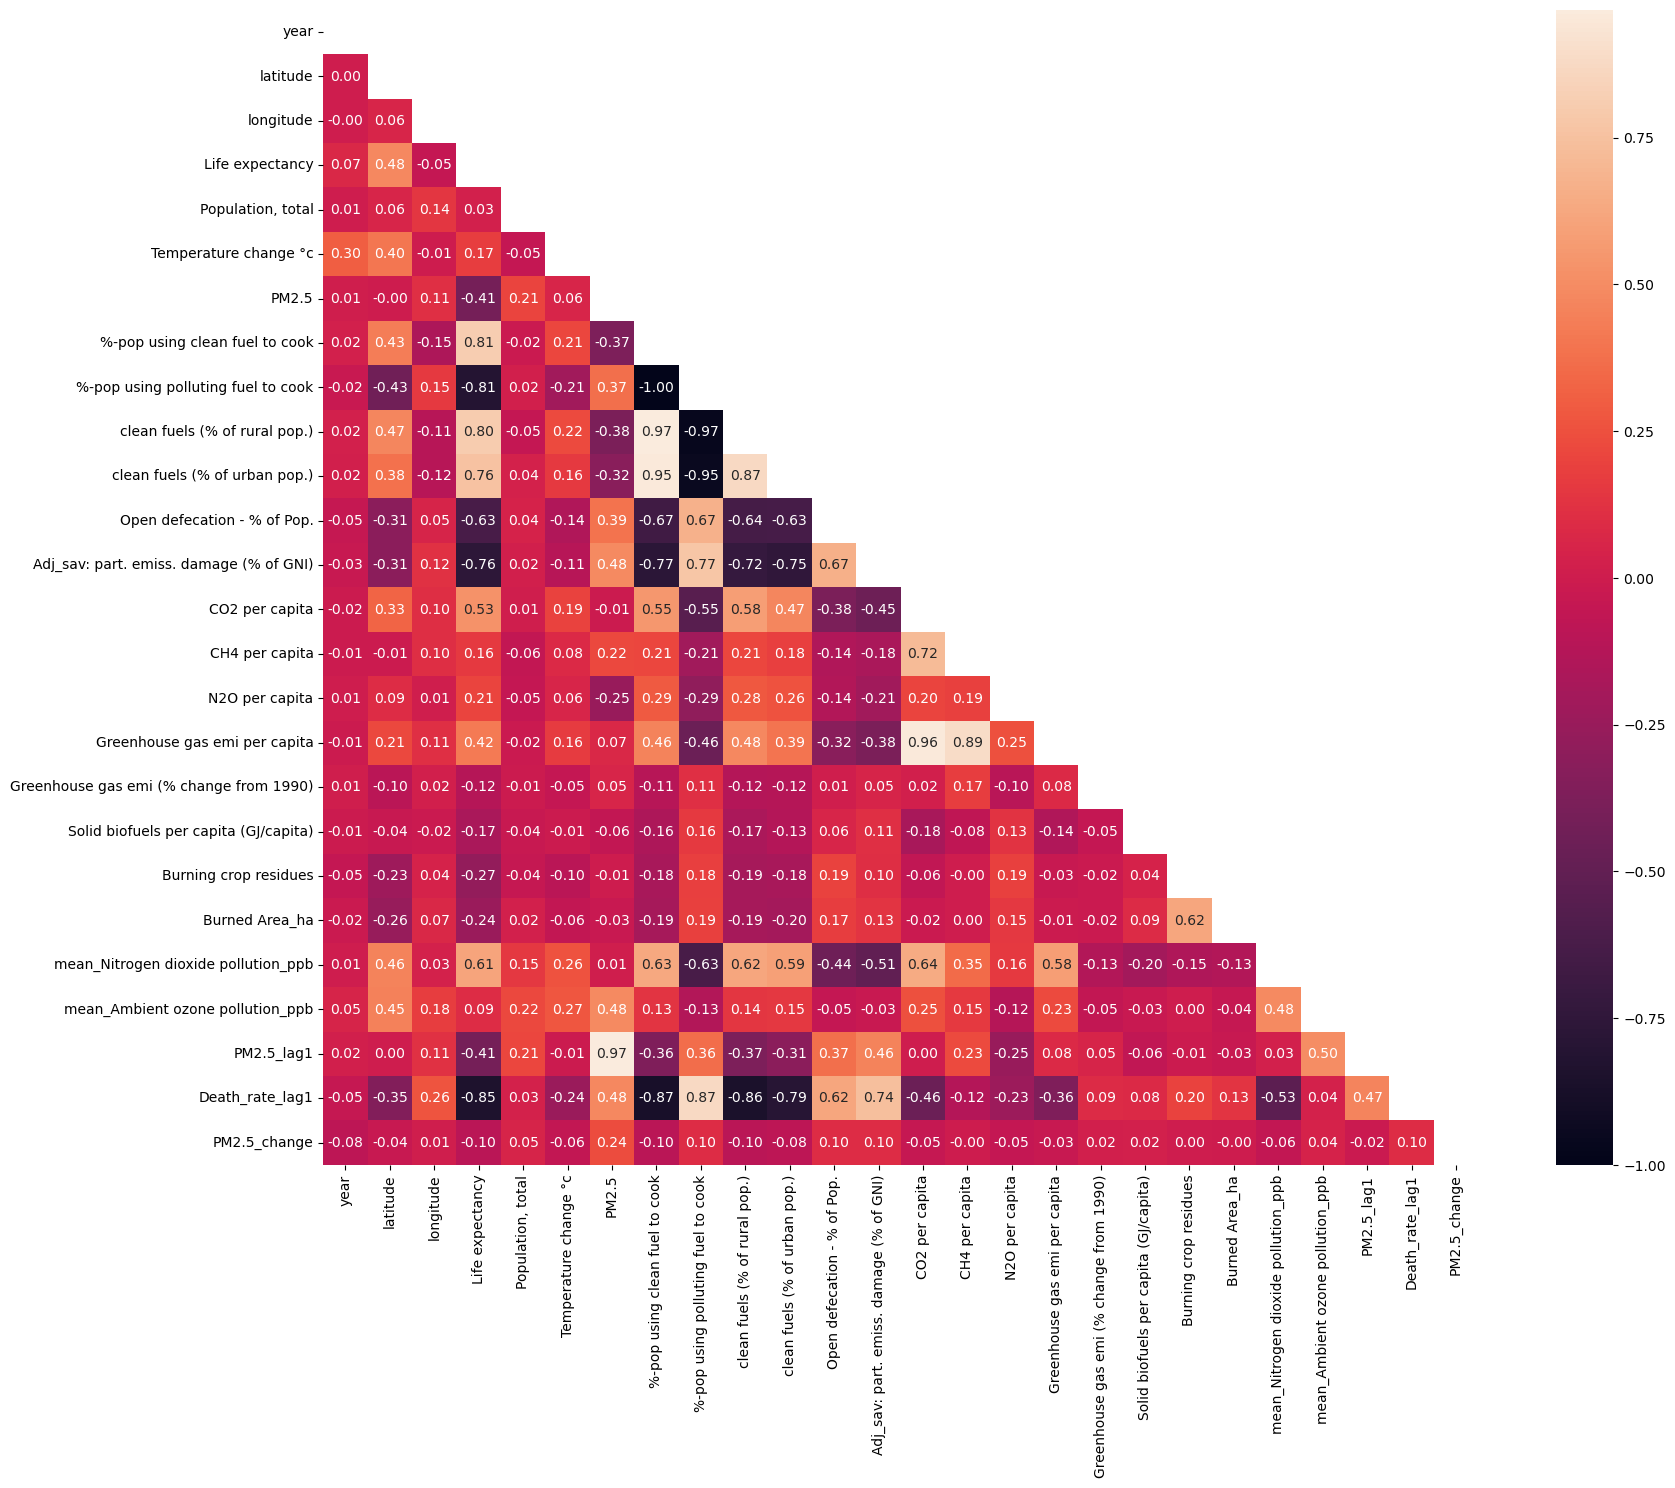

In [52]:
##correlation of train data
correlation = train_set.drop('death_rate',axis=1).corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation))
plt.figure(figsize=(20,15))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f', square=True)
plt.show()

### Using variaance inflation factor to further reduce data dimensionality

In [53]:
#columns that are updated after eliminating variables with large vif.
#nb: death rate is the target variable.

cols_to_drop = ['death_rate',
                'parent_country_id',
                'country_id',
                'country',
                'income_lvl', 
                '%-pop using polluting fuel to cook', 
                'CO2 per capita', 
                'CH4 per capita', 
                'N2O per capita', 
                'clean fuels (% of rural pop.)',
                'clean fuels (% of urban pop.)',
                'PM2.5_lag1', 'Death_rate_lag1', 'Life expectancy',
                'mean_Ambient ozone pollution_ppb', 
                'mean_Nitrogen dioxide pollution_ppb'
                ]

In [54]:
#imputing missing values in the train set for the calculation of VIF.
vif_dataset = train_set.drop(cols_to_drop,axis=1).copy() #a copy of train set
vif_mean = vif_dataset.mean()                            #mean for imputation for vif dataset
vif_dataset = vif_dataset.fillna(vif_mean)

In [55]:
#creating a dataframe for features and corresponding VIF values
vif = pd.DataFrame()
vif['features'] = vif_dataset.columns

In [56]:
vif['VIF'] = [variance_inflation_factor(vif_dataset.values, i) for i in range(len(vif_dataset.columns))]
vif

#columns shown below will be used in the the predictive model

,features,VIF
0,year,23.872240
1,latitude,2.446532
2,longitude,1.213384
3,"Population, total",1.190577
4,Temperature change °c,6.950456
5,PM2.5,6.248387
6,%-pop using clean fuel to cook,12.727991
7,Open defecation - % of Pop.,2.792889
8,Adj_sav: part. emiss. damage (% of GNI),4.719410
9,Greenhouse gas emi per capita,2.489948


In [57]:
# all columns to be used
all_cols_to_use = vif['features'].to_list()
all_cols_to_use.append('death_rate') #adding the target variable to the above features
all_cols_to_use.append('income_lvl') #adding income level of countries as a predictor
all_cols_to_use #all columns to be used

['year',
 'latitude',
 'longitude',
 'Population, total',
 'Temperature change °c',
 'PM2.5',
 '%-pop using clean fuel to cook',
 'Open defecation - % of Pop.',
 'Adj_sav: part. emiss. damage (% of GNI)',
 'Greenhouse gas emi per capita',
 'Greenhouse gas emi (% change from 1990)',
 'Solid biofuels per capita (GJ/capita)',
 'Burning crop residues',
 'Burned Area_ha',
 'PM2.5_change',
 'death_rate',
 'income_lvl']

In [58]:
#selecting the relevant columns for the predictive model
train = train_set[all_cols_to_use].copy()
val = val_set[all_cols_to_use].copy()
test = test_set[all_cols_to_use].copy()

In [59]:
X_train = train.drop('death_rate',axis=1) #input data for train set
X_val = val.drop('death_rate',axis=1)     #input data for validation set
X_test = test.drop('death_rate',axis=1)   #input data for test set

y_train = train['death_rate'].values      #target values for train set 
y_val = val['death_rate'].values          #target values for validation set 
y_test = test['death_rate'].values        #target values for test set

###### Pipeline and Column transformer for data transformation

In [60]:
# SimpleImputer: to be used to impute missing values
# OneHotEncoder: Used to transform categorical variables into numbers
# StandardScaler: Used to put numerical variables on similar scale of measurement 

In [61]:
cat_variables = ['income_lvl']                 #this is a categorcal variable to be used by OneHotEncoder
num_variables = X_train.drop('income_lvl',axis=1).columns #numerical columns to be used by Standard Scaler

In [62]:
#creating pipelines to handle numerical variables and categorical variables separately

#missing values in the numerical cols will be imputed by global mean 
num_pipeline = Pipeline([('impute', SimpleImputer(strategy='mean')), 
                        ('scaler', StandardScaler()) #standard scaler will the be applied after mean imputation
                        ])

#missing values in the categorical cols will be imputed by most frequent value 
cat_pipeline = Pipeline([('impute', SimpleImputer(strategy='most_frequent')),
                        ('onehot', OneHotEncoder(handle_unknown='ignore')) #one hot encoding will then be applied.
                        ])

In [63]:
#column transformer to handle the steps implemented in the pipeline.
preprocessor = ColumnTransformer([('impute', num_pipeline, num_variables), #for numerical columns
                                      ('cat', cat_pipeline, cat_variables) #for categorical columns
                                    ])

### Metrics calculation

In [64]:
def metrics_calculation(model, X, y, set_type:str):
    pred = model.predict(X)
    r2 = r2_score(y, pred)
    rmse = root_mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    print(f"{set_type} R-Square: {r2 * 100:.2f}%")
    print(f"{set_type} RMSE: {rmse:.2f}")
    print(f"{set_type} MAE: {mae:.2f}")
    return {"R2": r2, "RMSE": rmse, "MAE": mae}

# Applying machine learning algorithms for prediction

### 1. Linear regression as the baseline model

In [65]:
#creating a pipeline
lin_reg_pipeline = Pipeline([('preprocessor', preprocessor), 
                             ('lin_reg', LinearRegression())])

In [66]:
#fitting the train dataset
lin_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',
       'Greenhouse gas emi per capita',
       'Greenhouse gas emi (% change from 1990)',
       'Solid biofuels per capita (GJ/capita)', 'Burning crop residues',
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['income_lvl'])])),
                ('lin_reg', LinearRegression())])

In [67]:
#Training performance
metrics_calculation(model=lin_reg_pipeline, 
                    X=X_train, 
                    y=y_train, 
                    set_type='Train Lin Reg')

Train Lin Reg R-Square: 83.87%
Train Lin Reg RMSE: 34.96
Train Lin Reg MAE: 26.18


{'R2': 0.8387248075655416,
 'RMSE': 34.96471939006592,
 'MAE': 26.175927473652514}

In [68]:
#validation dataset performance 
metrics_calculation(model=lin_reg_pipeline, 
                    X=X_val, 
                    y=y_val, 
                    set_type='Val Lin Reg')

Val Lin Reg R-Square: 85.62%
Val Lin Reg RMSE: 30.80
Val Lin Reg MAE: 22.41


{'R2': 0.856234056790954,
 'RMSE': 30.797082856621532,
 'MAE': 22.405547246558598}

### 2. SVR

In [69]:
from sklearn.svm import SVR

In [70]:
#Using Support Vector Regressor Pipeline
svr_pipeline = Pipeline([('preprocessor', preprocessor), 
                         ('svr', SVR())])

In [71]:
svr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',
       'Greenhouse gas emi per capita',
       'Greenhouse gas emi (% change from 1990)',
       'Solid biofuels per capita (GJ/capita)', 'Burning crop residues',
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['income_lvl'])])),
                ('svr', SVR())])

In [72]:
#Training performance
metrics_calculation(model=svr_pipeline, 
                    X=X_train, 
                    y=y_train, set_type="Train SVR")

Train SVR R-Square: 68.38%
Train SVR RMSE: 48.96
Train SVR MAE: 35.24


{'R2': 0.6838082780435548, 'RMSE': 48.95775680142508, 'MAE': 35.2361267047999}

In [73]:
#using GridSearchCV for parameter selection that improves the model
from sklearn.model_selection import GridSearchCV

In [74]:
#using GridSearchCV for parameter selection that improves the model
svr_pipeline_grid = Pipeline([('preprocessor', preprocessor), 
                         ('svr', SVR())])

params_svc = {'svr__kernel':['linear', 'poly', 'rbf'], 
              'svr__degree': [2,3,4],
             'svr__epsilon': [0.01, 0.1, 0.5, 1]}

svr_grid = GridSearchCV(estimator=svr_pipeline_grid, 
                        param_grid=params_svc,
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('impute',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',...
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['income_lvl'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0.01, 0.1, 0.5, 1],
                         'svr__kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_root_mean_squared_error')

In [75]:
#validation dataset performance after grid search
metrics_calculation(model=svr_grid.best_estimator_, 
                    X=X_val, 
                    y=y_val, 
                    set_type="Val SVR")

Val SVR R-Square: 83.88%
Val SVR RMSE: 32.61
Val SVR MAE: 22.18


{'R2': 0.8387923832428763,
 'RMSE': 32.611768537067256,
 'MAE': 22.18055267419399}

### 3. Decision Tree 

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
#Using Decision tree Pipeline
dec_tree_pipeline = Pipeline([('preprocessor', preprocessor), 
                              ('dec', DecisionTreeRegressor(random_state=78))])

In [78]:
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',
       'Greenhouse gas emi per capita',
       'Greenhouse gas emi (% change from 1990)',
       'Solid biofuels per capita (GJ/capita)', 'Burning crop residues',
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['income_lvl'])])),
                ('dec', DecisionTreeRegressor(random_state=78))])

In [79]:
#training dataset performance
metrics_calculation(model=dec_tree_pipeline, 
                    X=X_train, 
                    y=y_train, 
                    set_type="Train Decision Tree")

Train Decision Tree R-Square: 100.00%
Train Decision Tree RMSE: 0.00
Train Decision Tree MAE: 0.00


{'R2': 1.0, 'RMSE': 0.0, 'MAE': 0.0}

In [80]:
#using GridSearchCV for parameter selection that improves the model
dec_tree_pipeline_grid = Pipeline([('preprocessor', preprocessor), 
                                    ('dec', DecisionTreeRegressor(random_state=90))])

params_dec = {
                            'dec__max_depth': [5, 10, 15],
                            'dec__max_features': ['sqrt', 'log2'],
                            'dec__max_leaf_nodes': [10, 20, 30]
                        }

dec_grid = GridSearchCV(estimator=dec_tree_pipeline_grid, 
                        param_grid=params_dec,
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

dec_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('impute',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',...
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['income_lvl'])])),
                                       ('dec',
                                        DecisionTreeRegressor(random_state=90))]),
             n_jobs=-1,
             param_grid={'dec__max_depth': [5, 10, 15],
                         'dec__max_features': ['sqrt', 'log2'],
                         'dec__max_leaf_nodes': [10, 20, 30]},
             scoring='neg_root_mean_squared_error')

In [81]:
#validation dataset performance after grid search
metrics_calculation(model=dec_grid.best_estimator_, 
                    X=X_val, 
                    y=y_val, 
                    set_type="Val Decision Tree")

Val Decision Tree R-Square: 82.12%
Val Decision Tree RMSE: 34.34
Val Decision Tree MAE: 25.16


{'R2': 0.8212236990358581,
 'RMSE': 34.342866846181025,
 'MAE': 25.15723129763056}

### 4. Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
#Using Decision tree Pipeline
rf_pipeline = Pipeline([('preprocessor', preprocessor), 
                        ('rf', RandomForestRegressor(random_state=8))])

In [84]:
#Training dataset
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',
       'Greenhouse gas emi per capita',
       'Greenhouse gas emi (% change from 1990)',
       'Solid biofuels per capita (GJ/capita)', 'Burning crop residues',
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['income_lvl'])])),
                ('rf', RandomForestRegressor(random_state=8))])

In [85]:
#Training performance
metrics_calculation(model=rf_pipeline, 
                    X=X_train, 
                    y=y_train, 
                    set_type="Train Rand. Forest")

Train Rand. Forest R-Square: 99.88%
Train Rand. Forest RMSE: 3.00
Train Rand. Forest MAE: 1.89


{'R2': 0.9988101801922721,
 'RMSE': 3.0032180126451307,
 'MAE': 1.8949544444444435}

In [86]:
#using GridSearchCV for parameter selection that improves the model
rf_pipeline_grid = Pipeline([('preprocessor', preprocessor), 
                             ('rf', RandomForestRegressor(random_state=70))])

params_rf = {
            'rf__max_depth': [10, 20, 30, None],
            'rf__max_leaf_nodes': [10, 20, 30, None]}

rf_grid = GridSearchCV(estimator=rf_pipeline_grid, 
                        param_grid=params_rf,
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('impute',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',...
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['income_lvl'])])),
                                       ('rf',
                                        RandomForestRegressor(random_state=70))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 20, 30, None],
                         'rf__max_leaf_nodes': [10, 20, 30, None]},
             scoring='neg_root_mean_squared_error')

In [87]:
#validation dataset performance after grid search
metrics_calculation(model=rf_grid.best_estimator_, 
                    X=X_val, 
                    y=y_val, 
                    set_type="Val Rand Forest")

Val Rand Forest R-Square: 98.75%
Val Rand Forest RMSE: 9.08
Val Rand Forest MAE: 6.14


{'R2': 0.9874960171124774, 'RMSE': 9.08250734600658, 'MAE': 6.135322804172687}

### 5. XGBoost

In [88]:
from xgboost import XGBRegressor

In [89]:
#Using Decision tree Pipeline
xgboost_pipeline = Pipeline([('preprocessor', preprocessor), 
                        ('xgboost', XGBRegressor(random_state=34))])

In [90]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',
       'Greenhouse gas emi per capita',...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=34, ...))])

In [91]:
#Training performance
metrics_calculation(model=xgboost_pipeline, 
                    X=X_train, 
                    y=y_train, 
                    set_type="Train XGBoost")

Train XGBoost R-Square: 100.00%
Train XGBoost RMSE: 0.35
Train XGBoost MAE: 0.25


{'R2': 0.9999840330782994,
 'RMSE': 0.3479019480546841,
 'MAE': 0.2511215885707308}

In [92]:
xgboost_pipeline_grid = Pipeline([('preprocessor', preprocessor), 
                             ('xgboost', RandomForestRegressor(random_state=77))])

params_xg = {
                'xgboost__n_estimators': [100, 200, 300],
                'xgboost__max_depth': [3, 5, 7, None]}

xg_grid = GridSearchCV(estimator=xgboost_pipeline_grid, 
                        param_grid=params_xg,
                        cv=5, 
                        scoring='neg_root_mean_squared_error',
                        n_jobs=-1)

xg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('impute',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['year', 'latitude', 'longitude', 'Population, total',
       'Temperature change °c', 'PM2.5', '%-pop using clean fuel to cook',
       'Open defecation - % of Pop.',
       'Adj_sav: part. emiss. damage (% of GNI)',...
       'Burned Area_ha', 'PM2.5_change'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['income_lvl'])])),
                                       ('xgboost',
                                        RandomForestRegressor(random_state=77))]),
             n_jobs=-1,
             param_grid={'xgboost__max_depth': [3, 5, 7, None],
                         'xgboost__n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error')

In [93]:
#validation dataset performance after grid search
metrics_calculation(model=xg_grid.best_estimator_, 
                    X=X_val, 
                    y=y_val, 
                    set_type="Val XGBoost")

Val XGBoost R-Square: 98.76%
Val XGBoost RMSE: 9.04
Val XGBoost MAE: 6.13


{'R2': 0.9876224397018225, 'RMSE': 9.036475965363016, 'MAE': 6.134696388888894}

# Final model 


##### XGBoost

In [94]:
#test set on final model
metrics_calculation(model=xg_grid.best_estimator_, 
                    X=X_test, 
                    y=y_test, 
                    set_type="Test XGBoost:")

Test XGBoost: R-Square: 97.87%
Test XGBoost: RMSE: 11.61
Test XGBoost: MAE: 8.38


{'R2': 0.9787109625172546,
 'RMSE': 11.606105169459557,
 'MAE': 8.381204444444453}

In [95]:
xg_grid.best_estimator_.named_steps.xgboost.feature_importances_

array([8.98312380e-04, 2.12343769e-02, 3.91970165e-02, 1.48320914e-02,
       9.79911714e-04, 1.66971223e-02, 7.36498178e-01, 1.23561768e-02,
       8.42216390e-02, 2.30222182e-02, 9.00354032e-03, 1.89097904e-02,
       1.29684207e-02, 4.03180927e-03, 3.83568311e-04, 2.82350807e-04,
       8.11408081e-04, 1.94859072e-03, 1.72347814e-03])

In [96]:
feature_names = xg_grid.best_estimator_.named_steps.preprocessor.get_feature_names_out()
importances = xg_grid.best_estimator_.named_steps.xgboost.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

                                            Feature  Importance
6            impute__%-pop using clean fuel to cook    0.736498
8   impute__Adj_sav: part. emiss. damage (% of GNI)    0.084222
2                                 impute__longitude    0.039197
9             impute__Greenhouse gas emi per capita    0.023022
1                                  impute__latitude    0.021234
11    impute__Solid biofuels per capita (GJ/capita)    0.018910
5                                     impute__PM2.5    0.016697
3                         impute__Population, total    0.014832
12                    impute__Burning crop residues    0.012968
7               impute__Open defecation - % of Pop.    0.012356
10  impute__Greenhouse gas emi (% change from 1990)    0.009004
13                           impute__Burned Area_ha    0.004032
17                     cat__income_lvl_Lower-middle    0.001949
18                     cat__income_lvl_Upper-middle    0.001723
4                     impute__Temperatur

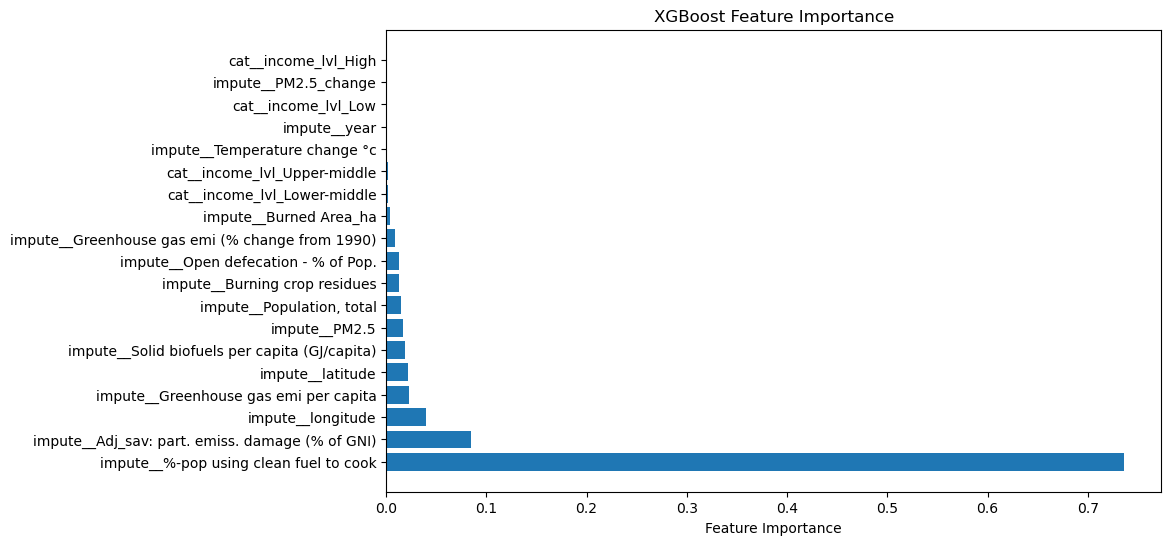

In [97]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.show()

# SHAP FOR FEATURE IMPORTANCE AND EXPLAINABLE AI

In [98]:
import shap
shap.initjs()

In [99]:
shap_x_test = xg_grid.best_estimator_.named_steps.preprocessor.transform(X_test)

In [100]:
column_names = pd.DataFrame(shap_x_test, 
                       columns=xg_grid.best_estimator_.named_steps.preprocessor.get_feature_names_out()).columns

In [101]:
explainer = shap.Explainer(xg_grid.best_estimator_.named_steps.xgboost, shap_x_test)
shap_values = explainer(shap_x_test)

 99%|===================| 178/180 [00:13<00:00]        

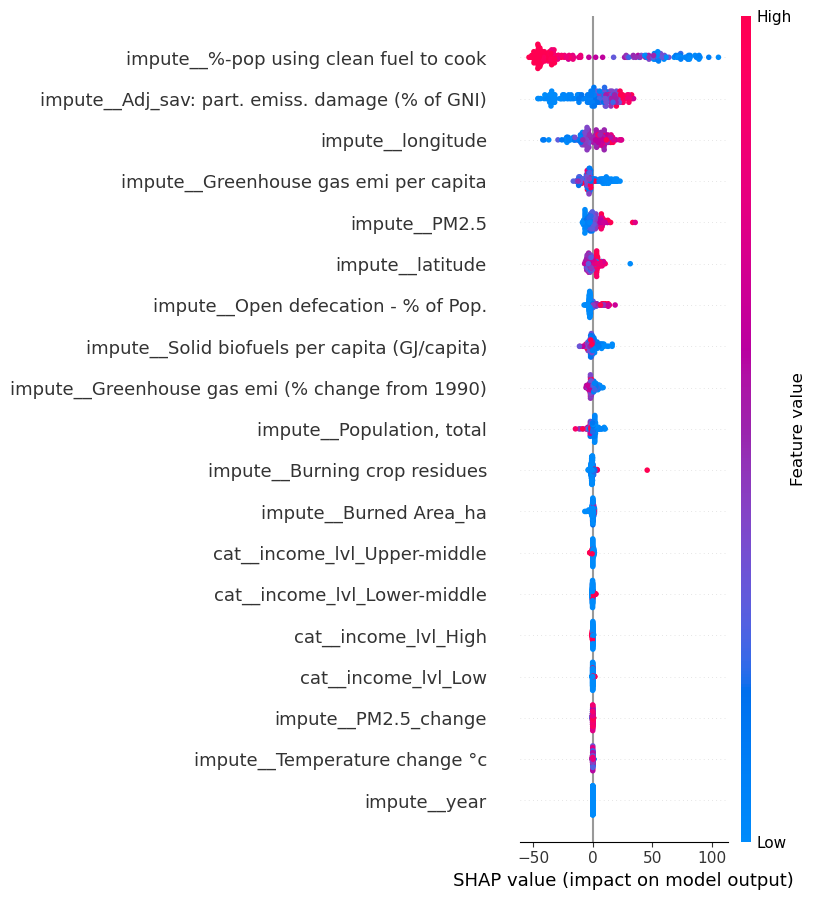

In [102]:
shap.summary_plot(shap_values, 
                  shap_x_test, 
                  feature_names=column_names)

# Regression Analysis

In [103]:
import statsmodels.api as sm

In [104]:
regression_data = main_dataset_updated_11[all_cols_to_use].copy()
regression_data.head()

,year,latitude,longitude,"Population, total",Temperature change °c,PM2.5,%-pop using clean fuel to cook,Open defecation - % of Pop.,Adj_sav: part. emiss. damage (% of GNI),Greenhouse gas emi per capita,Greenhouse gas emi (% change from 1990),Solid biofuels per capita (GJ/capita),Burning crop residues,Burned Area_ha,PM2.5_change,death_rate,income_lvl
0,2010,33.93911,67.709953,28189672.0,1.664,49.679377,19.9,18.34,2.973525,1.067749,120.073847,0.431009,0.111839,47379.6048,NaN,321.7,Low
1,2011,33.93911,67.709953,29249157.0,1.455,61.817056,21.3,17.50,3.103732,1.175377,151.362141,0.416935,0.009131,4013.5013,12.137679,311.0,Low
2,2012,33.93911,67.709953,30466479.0,0.271,70.922317,22.9,16.66,2.831011,1.062578,136.696644,0.409073,0.012066,5603.7173,9.105261,304.0,Low
3,2013,33.93911,67.709953,31541209.0,1.345,73.131816,24.5,15.82,2.793627,0.976763,125.256270,0.401633,0.012188,5753.4902,2.209499,300.1,Low
4,2014,33.93911,67.709953,32716210.0,0.521,77.143728,26.1,14.98,2.716563,0.951290,127.554288,0.393597,0.020972,3197.9498,4.011912,290.2,Low


In [105]:
reg_X_data = regression_data.drop('death_rate', axis=1)

In [106]:
reg_X_data = pd.get_dummies(reg_X_data)

In [107]:
mean = reg_X_data.mean(numeric_only=True)
reg_X_data = reg_X_data.fillna(mean)

In [108]:
reg_cols_to_drop = ['income_lvl_High']
reg_X_data = reg_X_data.drop(reg_cols_to_drop, axis=1)

In [109]:
#creating a dataframe for features and corresponding VIF values
vif_reg = pd.DataFrame()
vif_reg['features'] = reg_X_data.columns

In [110]:
vif_reg['VIF'] = [variance_inflation_factor(reg_X_data.values, i) for i in range(len(reg_X_data.columns))]
vif_reg

#columns shown below will be used in the the predictive model

,features,VIF
0,year,41.057866
1,latitude,2.669298
2,longitude,1.258923
3,"Population, total",1.213969
4,Temperature change °c,7.834305
5,PM2.5,6.953714
6,%-pop using clean fuel to cook,17.782886
7,Open defecation - % of Pop.,2.756420
8,Adj_sav: part. emiss. damage (% of GNI),4.655564
9,Greenhouse gas emi per capita,3.293724


In [111]:
reg_X_data = sm.add_constant(reg_X_data)
reg_y_data = regression_data['death_rate']

In [112]:
model = sm.OLS(reg_y_data, reg_X_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     539.6
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:27:13   Log-Likelihood:                -8879.9
No. Observations:                1800   AIC:                         1.780e+04
Df Residuals:                    1781   BIC:                         1.790e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### removing non-significant variables

In [113]:
reg_X_data_significant = reg_X_data.drop(['latitude', 
                                         'Temperature change °c', 
                                         'Open defecation - % of Pop.', 
                                         'Greenhouse gas emi (% change from 1990)',
                                        'PM2.5_change'], axis=1)

In [114]:
reg_X_data_significant = sm.add_constant(reg_X_data_significant)
reg_y_data = regression_data['death_rate']

In [115]:
model = sm.OLS(reg_y_data, reg_X_data_significant).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     746.4
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:27:13   Log-Likelihood:                -8882.8
No. Observations:                1800   AIC:                         1.779e+04
Df Residuals:                    1786   BIC:                         1.787e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------